# Assignment 4.1

Name: Steve Amancha   
Date: June 3 2023  

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

In [1]:
import random
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sample_size = 100
samples = 100000

# Generate 1,000 samples of size 50, take average of lower and upper quartiles
y = []
for i in range(0,100000):
    x = stats.norm.rvs(size=100)
    calc = (np.quantile(x, 0.75) + np.quantile(x, 0.25))/2
    y.append(calc)
    
# Find standard deviation of the 100,000 estimates
estimate_sd = round(np.std(y) , 2)
# Find the theoretical standard error
se = 1/np.sqrt(100)
print('The estimated standard deviation is {}'.format(estimate_sd))
print('The theoretical standard error is {}'.format(se))

The estimated standard deviation is 0.11
The theoretical standard error is 0.1


## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

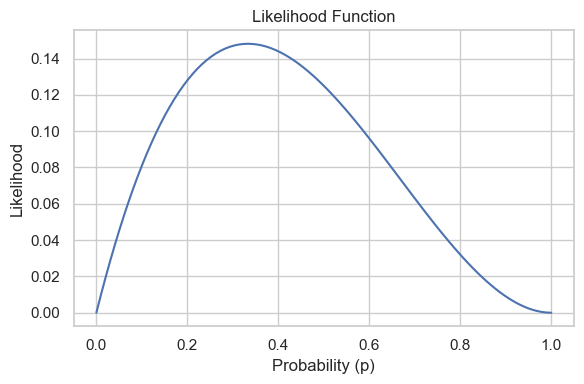

In [326]:
def likelihood(y, p):
    return (1 - p)**(y - 1) * p

y = 3 

# Range of probabilities
p_values = np.linspace(0, 1, 100)

# Find likelihood for p values
likelihoods = likelihood(y, p_values)

sns.set(style="whitegrid")
# Create histograms
plt.figure(figsize=(6, 4))

# Plotting the likelihood function
plt.plot(p_values, likelihoods)
plt.xlabel('Probability (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.tight_layout()
plt.show()

## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

By having a confidence interval of [0.57, 0.84], it suggests that a high level of certainty in the belief in life after death within this sample. 

In [135]:
# Reading data and displaying data frame head
data_url = 'https://stat4ds.rwth-aachen.de/data/Students.dat'
students_data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(students_data)
# display(df.head())

wald_ci = 0.95

# belief in life after death (1 = yes, 2 = no, 3 = undecided)
# Filtering out the undecided people from the population and calculating sample size
rows_life_after_death = df.loc[df['life'] != 3]
total_rows = len(rows_life_after_death.index)

# Compute the maximum likelihood estimate (MLE) for the proportion
p_hat = (rows_life_after_death['life'] == 1).mean()
std_dev = np.std(rows_life_after_death['life'])
std_error = std_dev/(np.sqrt(total_rows))

# Compute the z-score for a 95% confidence interval
z = stats.norm.ppf(1 - (1 - wald_ci) / 2)

# calculate Wald interval for the 95% confidence interval, z score = 1.96
lower_ninety_five_ci = p_hat - (z * std_error)
upper_ninety_five_ci = p_hat + (z * std_error)

print("p", p_hat)
print("std dev", std_dev) 
print("standard error", std_error)
print("%s [%.2f, %.2f]" % ('95% Confidence Interval: ', lower_ninety_five_ci, upper_ninety_five_ci))

p 0.7045454545454546
std dev 0.4562468159064711
standard error 0.06878179546164175
95% Confidence Interval:  [0.57, 0.84]


## Problem # 4.5. 

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent cumulative datafile at sda.berkeley.edu/archive.htm by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

I see that the percentage of those in favor of legalizing marijuana has increased almost consistently from 1973 to the final year in 2018. 


The 95% confidence interval created contains these probabilities [0.62, 0.67] which suggests that there is a high probability that a majority on the population supports legalization. 

In [72]:
# Given parameters
in_favor = 938
n = 1447
wald_ci = 0.95

# Calculate the proportion of respondents in favor
proportion = in_favor / n

# Calculate the standard error
std_error = np.sqrt(proportion * (1 - proportion) / n)

# Compute the z-score for a 95% confidence interval
z = stats.norm.ppf(1 - (1 - wald_ci) / 2)

#  Wald 95% confidence interval, z score = 1.96
lower_ninety_five_ci = proportion - (z * std_error)
upper_ninety_five_ci = proportion + (z * std_error)

print("standard error * z score:", std_error * z)
print("%s [%.2f, %.2f]" % ('95% Confidence Interval: ', lower_ninety_five_ci, upper_ninety_five_ci))

standard error * z score: 0.024603993561284027
95% Confidence Interval:  [0.62, 0.67]


## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

She should use a sample size of 384

In [84]:
import scipy.stats as stats

# Given probability and margin of error 
confidence = 0.95  
margin_of_error = 0.05

# Calculate the Z-score corresponding to the desired confidence level
z = stats.norm.ppf((1 + confidence ) / 2)

# Assume maximum proportion (p = 0.5) to get maximum sample size
p = 0.5

# Calculate the sample size
sample_size = (z**2 * p * (1 - p)) / (margin_of_error**2)

# Round up to the nearest whole number
sample_size = round(sample_size)

print(f"Required sample size:", sample_size)

Required sample size: 384


## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

95% Confidence Interval:  [0.74, 2.66] suggests that a majority of the sample watches in between 45 minutes to rougly 2.5 hours daily.  

In [134]:
# Given parameters
daily_tv_hours = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
subjects_total = 10
confidence = 0.95

# Calculate sample mean and std_error 
sample_mean = np.mean(daily_tv_hours)
std_error = stats.sem(daily_tv_hours)

# Calculate the degrees of freedom
degrees_of_freedom = subjects_total - 1

# Calculate the t-value corresponding to the desired confidence level and degrees of freedom
t = stats.t.ppf((1 + confidence) / 2, degrees_of_freedom)
print(t)

#  95% confidence interval, t score = at 2.26
lower_ninety_five_ci = sample_mean - (t * std_error)
upper_ninety_five_ci = sample_mean + (t * std_error)

print("%s [%.2f, %.2f]" % ('95% Confidence Interval: ', lower_ninety_five_ci, upper_ninety_five_ci))


2.2621571627409915
95% Confidence Interval:  [0.74, 2.66]


95% Confidence Interval:  [-1.46, 8.86]  
Outliers impact the confidence interval for means tremendously, it widens the range of the confidence interval which makes it harder to make an accurate analysis.

In [156]:
daily_tv_hours = [0, 0, 1, 1, 1, 2, 2, 3, 3, 24]

# Calculate sample mean and std_error 
sample_mean = np.mean(daily_tv_hours)
std_error = stats.sem(daily_tv_hours)

t = stats.t.ppf( (1 + confidence) / 2, degrees_of_freedom)

#  95% confidence interval, t score = at 2.26
lower_ninety_five_ci = sample_mean - (t * std_error)
upper_ninety_five_ci = sample_mean + (t * std_error)

print("%s [%.2f, %.2f]" % ('95% Confidence Interval: ', lower_ninety_five_ci, upper_ninety_five_ci))

95% Confidence Interval:  [-1.46, 8.86]


## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

a)   
Confidence intervals for the mean tv hours watched weekly   
mean:  7.23  
Confidence Interval:  [5.58, 8.95]  
Assumptions: Random sample, normal population distributions, central limit theory applies

b)
Confidence intervals for the mean tv hours watched by FEMALES weekly  
mean:  7.98  
Confidence Interval:  [6.40, 9.57]  

Confidence intervals for the mean tv hours watched by MEN weekly  
mean:  6.5  
Confidence Interval:  [4.73, 8.27]  
Assumptions: Random sample, normal population distributions, independent samples

By calculating the mean for men and females seperately I am able to interpret that females tend to watch tv more often than men on average. The confidence interval range are fairly similar but has a lower end for Men which agrees with the difference of th means. This could be important for a marketing company trying to understand what percentage to advertise ads for men or females. 

In [218]:
def calc_confidence_interval(mean, z, std_error):
    #  Wald 95% confidence interval, z score = 1.96
    lower_ninety_five_ci = mean - (z * std_error)
    upper_ninety_five_ci = mean + (z * std_error)
    print("mean: ", mean)
    print("%s [%.2f, %.2f]" % ('Confidence Interval: ', lower_ninety_five_ci, upper_ninety_five_ci))
    

# Reading data and displaying data frame head
data_url = 'https://stat4ds.rwth-aachen.de/data/Students.dat'
students_data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(students_data)

# Given args and dataset focus
confidence = 0.95
gender_tv_hours_df = df[['gender', 'tv']].copy()
sample_size = gender_tv_hours_df['tv'].size

# calculating tv hours mean and the standard error 
tv_hours_mean = np.mean(gender_tv_hours_df['tv'])
std_dev_tv_hours_mean = np.std(gender_tv_hours_df['tv'])
std_error = std_dev_tv_hours_mean / np.sqrt(sample_size)

# Compute the z-score for a 95% confidence interval
z = stats.norm.ppf(1 - (1 - confidence) / 2)

print("Confidence intervals for the mean tv hours watched weekly")
calc_confidence_interval(tv_hours_mean, z, std_error)
# Confirming answer with second approach by python function
confidence_interval = stats.norm.interval(0.95, loc=tv_hours_mean, scale=std_dev_tv_hours_mean / (sample_size)**0.5)
print(confidence_interval)

# filter data into male and female categories
females_tv_hours = df.loc[df['gender'] == 1, 'tv']
males_tv_hours = df.loc[df['gender'] == 0, 'tv']

# Calculate stats for females weekly hours of tv
female_tv_hours_mean = np.mean(females_tv_hours)
female_tv_hours_std_dev = np.std(females_tv_hours)
std_error = female_tv_hours_std_dev / np.sqrt(sample_size)
print("\nConfidence intervals for the mean tv hours watched by FEMALES weekly")
calc_confidence_interval(female_tv_hours_mean, z, std_error)

# Calculate stats for males weekly hours of tv
male_tv_hours_mean = np.mean(males_tv_hours)
male_tv_hours_std_dev = np.std(males_tv_hours)
std_error = male_tv_hours_std_dev / np.sqrt(sample_size)
print("\nConfidence intervals for the mean tv hours watched by MEN weekly")
calc_confidence_interval(male_tv_hours_mean, z, std_error)

print("\nConfidence interval of comparing females and males on mean weekly tv hours")
mean_diff = female_tv_hours_mean - male_tv_hours_mean
std_diff = (female_tv_hours_std_dev**2 / len(females_tv_hours) + male_tv_hours_std_dev**2 / len(males_tv_hours))**0.5

# Finds the confidence interval for the combined set 
confidence_interval_diff = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff)
print(confidence_interval_diff)

Confidence intervals for the mean tv hours watched weekly
mean:  7.266666666666667
Confidence Interval:  [5.58, 8.95]
(5.581201043473342, 8.95213228985999)

Confidence intervals for the mean tv hours watched by FEMALES weekly
mean:  7.983870967741935
Confidence Interval:  [6.40, 9.57]

Confidence intervals for the mean tv hours watched by MEN weekly
mean:  6.5
Confidence Interval:  [4.73, 8.27]

Confidence interval of comparing females and males on mean weekly tv hours
(-1.880047962699761, 4.847789898183631)


## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

The 95% Wald CIs:   
Confidence Interval for Males:  (0.716, 0.772)  
Confidence Interval for Females: (0.844 0.883)  
Confidence Interval for difference in Males and Females (0.085, 0.153)  
There is a 95% chance that the all those CI's contains the true proportion for the samples belief on life after death.  

In [237]:
# define and caculate parameters and proportions
confidence = 0.95
yes_females = 1017
n_females = 1178
females_prop = yes_females / n_females

yes_males = 703
n_males = 945
male_prop = yes_males / n_males

mean_male_prop = np.mean(male_prop)
mean_female_prop = np.mean(females_prop)

# Calculating standard error 
se_female = np.sqrt((females_prop * (1 - females_prop)) / n_females)
se_male = np.sqrt((male_prop * (1 - male_prop)) / n_males)

# Calculating and printing CI's 
confidence_interval_diff = stats.norm.interval(confidence, loc=mean_male_prop, scale=se_male)
print("Confidence Interval for Males: ", round(confidence_interval_diff[0],3), round(confidence_interval_diff[1],3) )

confidence_interval_diff = stats.norm.interval(confidence, loc=mean_female_prop, scale=se_female)
print("Confidence Interval for Females", round(confidence_interval_diff[0],3), round(confidence_interval_diff[1],3) )

# Calculating combined std 
se_diff = np.sqrt(se_female**2 + se_male**2)
confidence_interval_diff = stats.norm.interval(confidence, loc=(mean_female_prop - mean_male_prop), scale=(se_diff))
print("Confidence Interval for difference in Males and Females", round(confidence_interval_diff[0],2), round(confidence_interval_diff[1],2) )

Confidence Interval for Males:  0.716 0.772
Confidence Interval for Females 0.844 0.883
Confidence Interval for difference in Males and Females 0.085 0.153


## Problem # 4.16.

The `Substance` data file at the book’s website shows a contingency table formed from a survey
that asked a sample of high school students whether they have ever used alcohol, cigarettes,
and marijuana. Construct a 95% Wald confidence interval to compare those who have used or
not used alcohol on whether they have used marijuana, using **(a)** formula (4.13); **(b)** software.
State assumptions for your analysis, and interpret results.

Assumptions: Independent to each other, sample size large enough to apply the central limit theorem, variances are not nearly equal
Analysis: There is a 95% chance that when comparing someone who uses marijuana with and without using alchol, that the difference between the two proportions is in between the 0.45 and 0.5 a majority of the time.  


In [318]:
# Reading data and displaying data frame head
data_url = 'https://stat4ds.rwth-aachen.de/data/Substance.dat'
students_data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(students_data)
z = 1.96    # critical value for 95% confidence

# Calculating proportion 1 for yes alchol and yes MJ and sum of yes alchol group
alc_mj_prop = df.loc[(df['alcohol'] == 'yes') & (df['marijuana'] == 'yes'), 'count'].sum() / df.loc[df['alcohol'] == 'yes', 'count'].sum()
n_alc_yes = df.loc[df['alcohol'] == 'yes', 'count'].sum()

# Calculating proportion 2 for no alchol and yes MJ and sum of no alchol group 
no_alc_mj_prop = df.loc[(df['alcohol'] == 'no') & (df['marijuana'] == 'yes'), 'count'].sum() / df.loc[df['alcohol'] == 'no', 'count'].sum()
n_alc_no = df.loc[df['alcohol'] == 'no', 'count'].sum()

mean_prop_diff = alc_mj_prop - no_alc_mj_prop
se_diff = np.sqrt(alc_mj_prop * (1 - alc_mj_prop) / n_alc_yes + no_alc_mj_prop * (1 - no_alc_mj_prop) / n_alc_no)

# Using the formula from the book 
lower_ninety_five_ci = mean_prop_diff - (z * se_diff)
upper_ninety_five_ci = mean_prop_diff + (z * se_diff)
print("%s [%.2f, %.2f]" % ('95% Confidence Interval: ', lower_ninety_five_ci, upper_ninety_five_ci))

# Using the software 
confidence_interval_diff = stats.norm.interval(confidence, loc=mean_prop_diff, scale=se_diff)
print("95% Confidence Interval using software function", round(confidence_interval_diff[0],2), round(confidence_interval_diff[1],2) )

95% Confidence Interval:  [0.45, 0.50]
95% Confidence Interval using software function 0.45 0.5


## Problem # 4.18.

A standardized variable $Y$ dealing with a financial outcome is considered to take an unusually
extreme value if $y > 3$. Find $P(Y > 3)$ if **(a)** $Y$ is modeled as having a standard normal distribution $Y\sim N(0, 1)$ , **(b)** $Y$ instead behaves like a ratio of standard normal random variables,
in which case $Y$ has the standard Cauchy distribution (4.11). What do you observe?

I observed that the probability was more using the cauchy distribution. This is because cauchy distribution has heavier tails than a normal standard distribution. 

In [319]:
# using 1 - to get the right side of the distribution 
y_norm_gt3 = 1 - stats.norm.cdf(3)
print(f"P(Y>3) for a standard normal distribution ~ N(0,1) {y_norm_gt3}")

y_cauchy_gt3 = 1 - stats.cauchy.cdf(3)
print(f"P(Y>3) for Y~Cauchy(0, 1): {y_cauchy_gt3}")

P(Y>3) for a standard normal distribution ~ N(0,1) 0.0013498980316301035
P(Y>3) for Y~Cauchy(0, 1): 0.10241638234956674


## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

ML estimate:  1.0
Bayesian estimate (posterior mean with uniform prior): 0.92

In [298]:
# Givens
n_students = 10 
yes_students = 10
print("ML estimate: ", yes_students / n_students)

# Formula from the book for a uniform prior distribution
alpha = 1 + yes_students
beta = 2 + n_students

bayesian_estimate = alpha / beta
print(f'Bayesian estimate (posterior mean with uniform prior): {bayesian_estimate:.2f}')

ML estimate:  1.0
Bayesian estimate (posterior mean with uniform prior): 0.92


## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

Assumptions:  
The two housing datasets are independent from each other  
Normality in the distribution  
Verified that the variances are not nearly equal.  

New home mean price: 436.45 dollars (k) | standard error: 66.28   
Old home mean price: 207.85 dollars (k)  | standard error: 12.83    
95% confidence interval for the difference in means: (94.63, 362.57)  
t-statistic: 3.39  
p-value: 0.01  

New home mean price: $436.45 thousand dollars and standard error: 66.28
Old home mean price: $207.85 thousand dollars and standard error: 12.83
95% confidence interval for the difference in means: (94.63, 362.57)
t-statistic: 3.39
p-value: 0.01


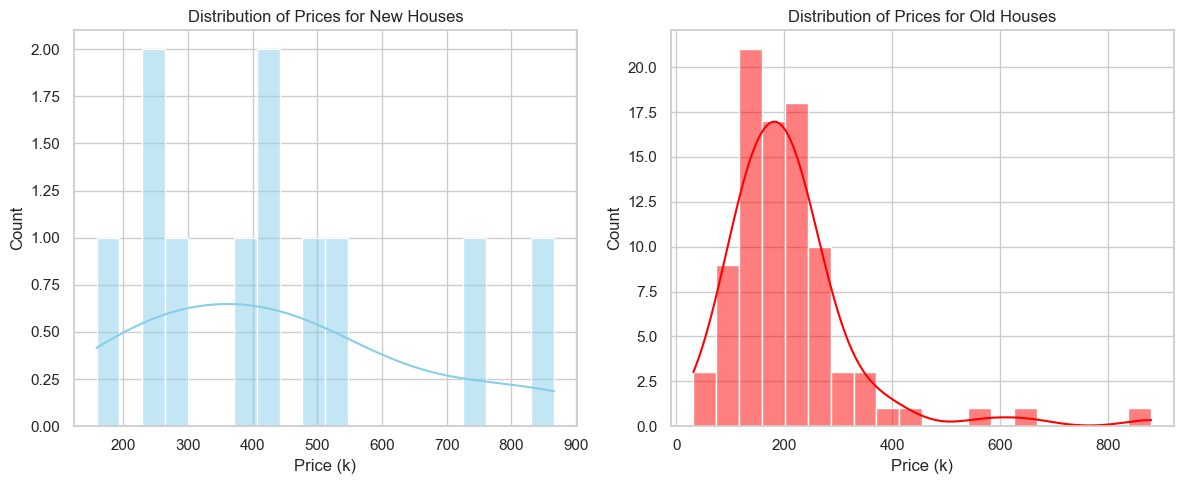

In [320]:
# Reading data and displaying data frame head
data_url = 'https://stat4ds.rwth-aachen.de/data/Houses.dat'
students_data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(students_data)
new_homes = df.loc[df['new'] == 1]
old_homes = df.loc[df['new'] == 0]
n_total = len(old_homes) + len(new_homes)
confidence = 0.95

# calculating new home mean and std
new_homes_mean_price = round(np.mean(new_homes['price']), 2)
new_homes_se = round(stats.sem(new_homes['price']), 2) 

# calculating old home mean and std
old_homes_mean_price = round(np.mean(old_homes['price']), 2)
old_homes_se = round(stats.sem(old_homes['price']), 2)

print(f"New home mean price: ${new_homes_mean_price} thousand dollars and standard error: {new_homes_se}")
print(f"Old home mean price: ${old_homes_mean_price} thousand dollars and standard error: {old_homes_se}")

# Calculating the t-value corresponding to the desired confidence level and degrees of freedom
dof = n_total - 2 
t = stats.t.ppf((1 + confidence) / 2, dof)
mean_diff = new_homes_mean_price - old_homes_mean_price
se_diff = np.sqrt(old_homes_se**2 + new_homes_se**2)
t_stat, p_value = stats.ttest_ind(new_homes['price'], old_homes['price'], equal_var=False)

# Compute the confidence interval
ci_lower = mean_diff - (t * se_diff)
ci_upper = mean_diff + (t * se_diff)
print(f"95% confidence interval for the difference in means: ({ci_lower:.2f}, {ci_upper:.2f})")

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.2f}")

# Set the style of seaborn
sns.set(style="whitegrid")

# Create histograms
plt.figure(figsize=(12, 5))

# Creating plots and labeling 
plt.subplot(1, 2, 1)
sns.histplot(new_homes['price'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Prices for New Houses')
plt.xlabel('Price (k)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(old_homes['price'], bins=20, color='red', kde=True)
plt.title('Distribution of Prices for Old Houses')
plt.xlabel('Price (k)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()